#**Assignment Case study on unsupervised learning**

Try out different clustering models in the given dataset.

Find the optimum
number of clusters in each model and create the model with optimum number of
clusters.

Also learn about dB scan clustering and implement it.

**Import all the basic required libraries into Python environment**:

In [1]:
import pandas as pd             # python library to manipulate data. pandas is acronym of panneled data
import numpy as np              # numerical python . python library for arithmetical operations

#python library for data visualisation

import matplotlib.pyplot as plt # 2D ploting library
import seaborn as sns           # baseon matplotlib provides a high-level interface for drawing attractive and informative statistical graphics

**Load the DataSet into Python environment**



In [2]:
data=pd.read_csv('/content/drive/MyDrive/Wine_clust .csv')

Display first 5 observations in each column of the data set

In [3]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Shape or number of observations and columns

In [4]:
data.shape

(178, 13)

Do all the necessary pre-processing steps:

Pre Processing may include the following steps

Step 1 : Check out the missing values

Step 2 : Check out the outliers

Step 3 : See the Categorical Values

Step 4 : Splitting the data-set into Training and Test Set

Step 5 : Feature Scaling

Check for missing values

In [5]:
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [6]:
# No null values present


Check the DataTypes

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [8]:
# Only numeric features are present

Check for Duplicales

In [9]:
data.duplicated().sum()

0

In [10]:
# No duplicate values found

Find statitical summary

In [11]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Column names

In [12]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

Visualisation

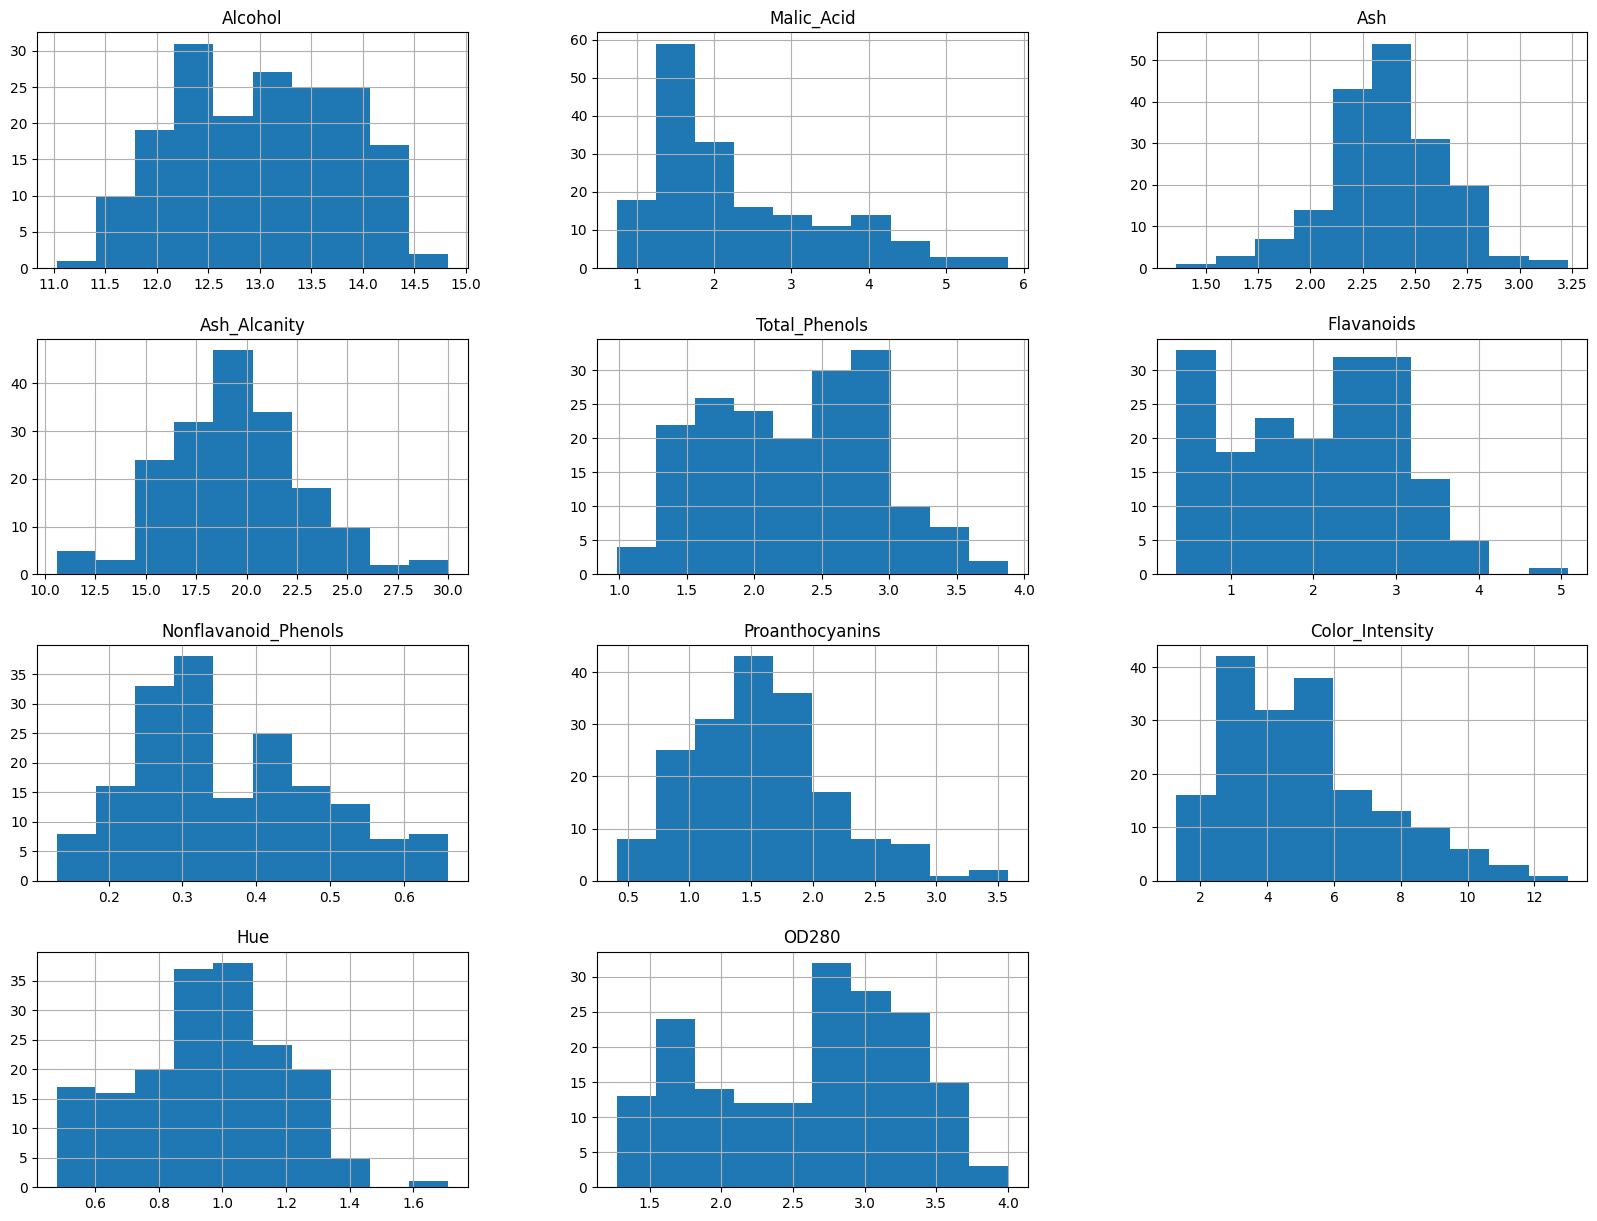

In [13]:
freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

To check for Outliers drawing Boxplot for numerical features

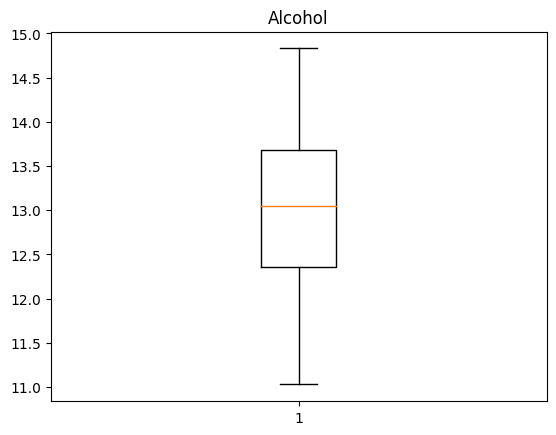

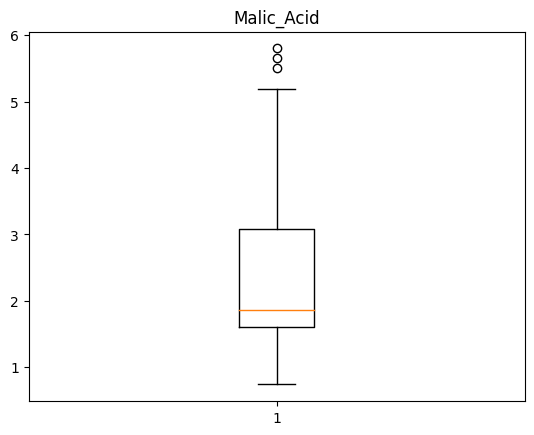

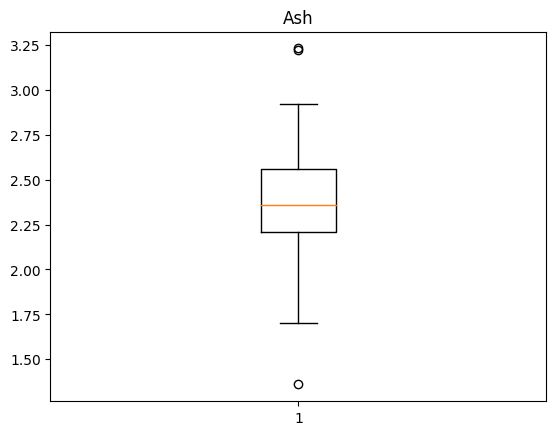

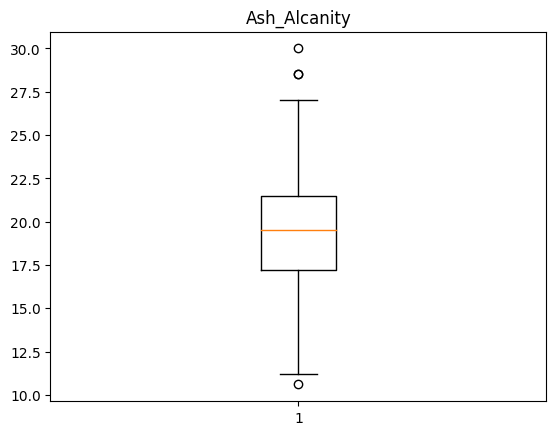

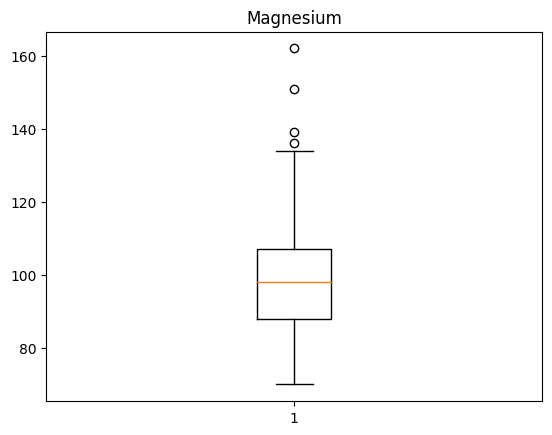

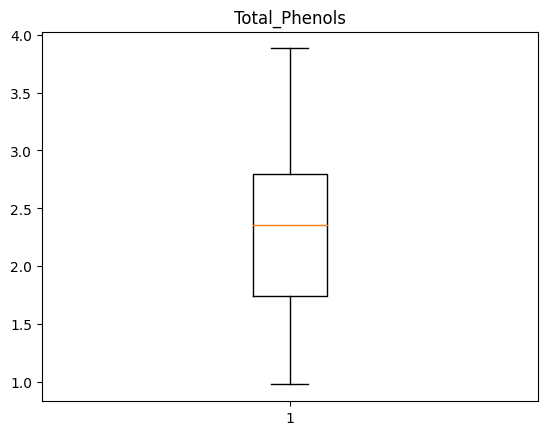

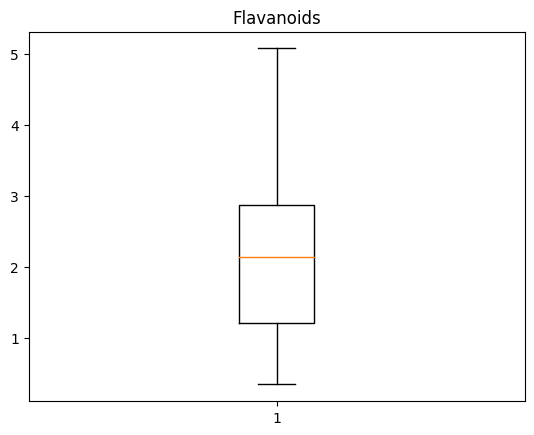

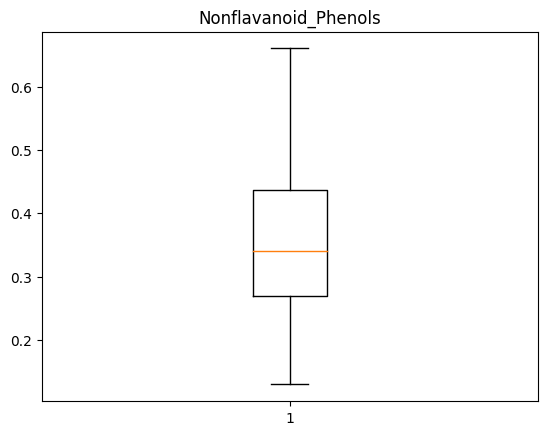

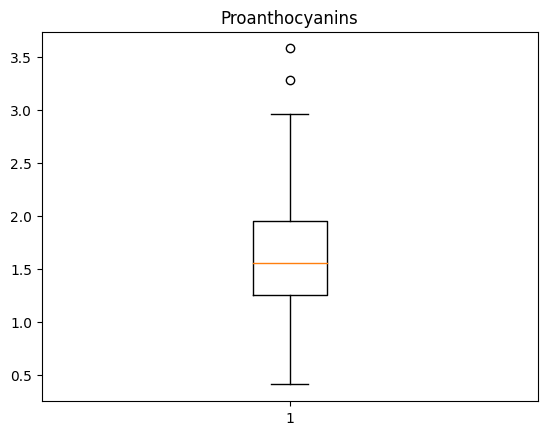

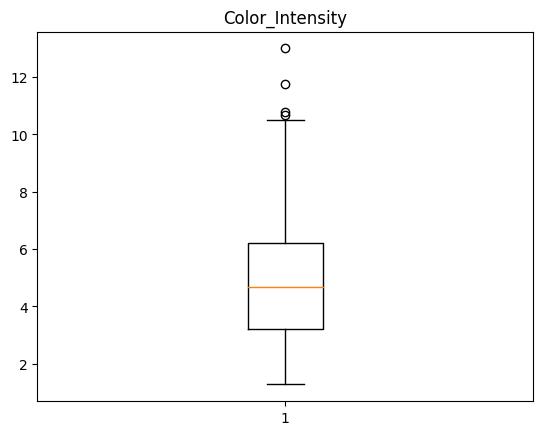

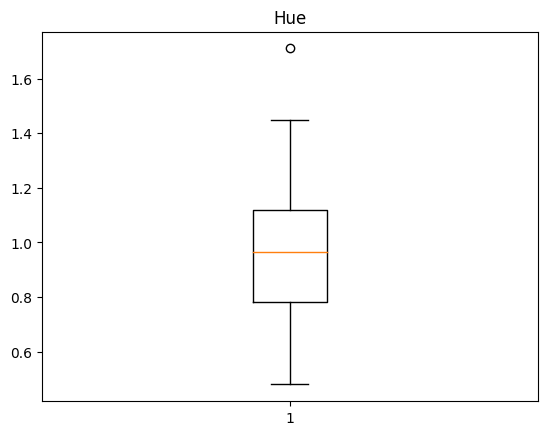

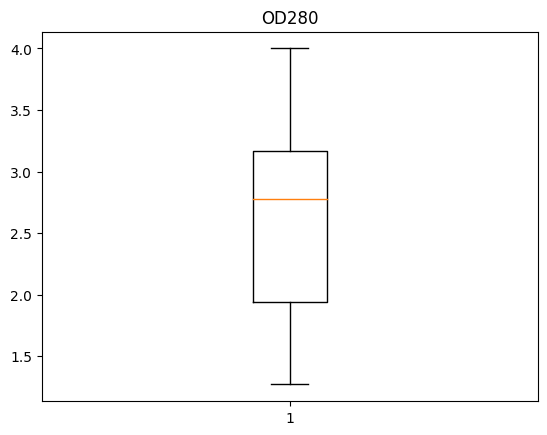

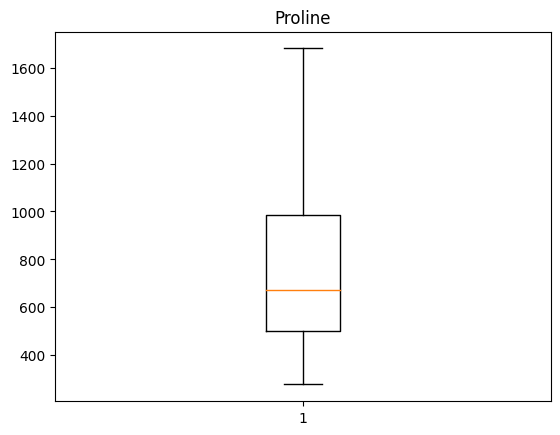

In [14]:
columns=['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']

for feature in columns:
  plt.figure()
  plt.boxplot(data[feature])
  plt.title(feature)

In [15]:
# Considerably negligible outliers are present, and there are more discrete features too

Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler  # Import Scaling tools to make all columns on to a standard range of scale

scaler=StandardScaler()
scaled_data=scaler.fit_transform(data)

In [17]:
scaled_data

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [18]:
# Values are stored as numpy array and hence it need to convert into a new data frame

scaled_data=pd.DataFrame(scaled_data,columns=data.columns)

In [19]:
scaled_data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [20]:
scaled_data.shape

(178, 13)

**Principal Component Analysis**

PCA can be performed in different waysas per our convenience.

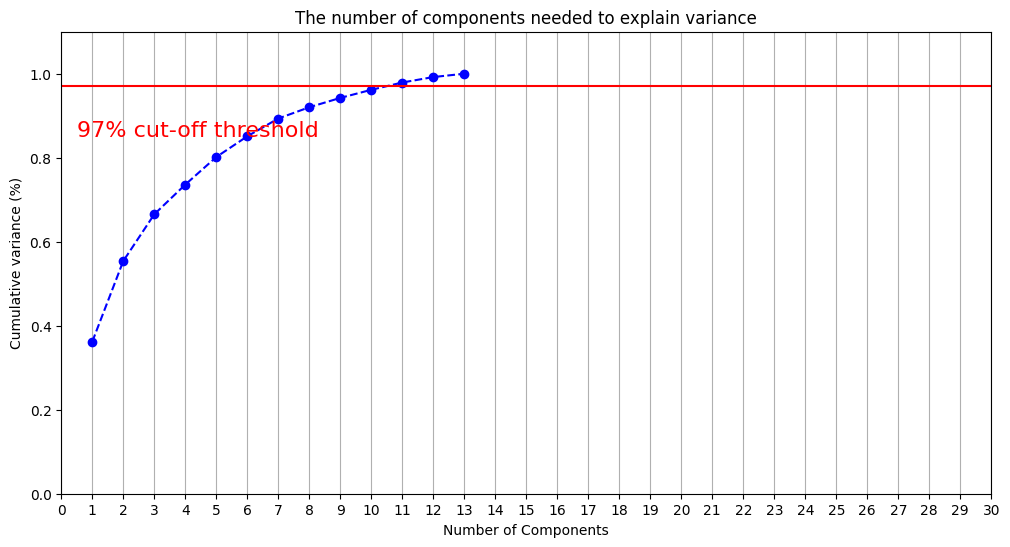

In [21]:
from sklearn.decomposition import PCA
pca = PCA().fit(scaled_data)

plt.rcParams["figure.figsize"] = (12,6)
# .rcParams is a dictionary-like object in matplotlib that stores the runtime configuration settings for the library
#  It provides a way to customize the behavior and appearance of matplotlib plots

fig, ax = plt.subplots()
#creates new figure and axes object
# fig: variable representing the figure
# ax: variable representing the axes on which the data is plotted

xi = np.arange(1, 14, step=1)
# creates an array xi that contains numbers from 1 to 30 (inclusive) with a step of 1
#  used as the x-values for plotting purposes

y = np.cumsum(pca.explained_variance_ratio_)
# calculates the cumulative sum of the explained variance ratio from a PCA (Principal Component Analysis) object,
# assuming pca is a valid PCA model
# resulting values are stored in the array 'y' and are typically used as the y-values for plotting


# setting the y axis limits
plt.ylim(0.0,1.1)
# The first argument 0.0 represents the lower limit, and the second argument 1.1 represents the upper limit
# y axis ranges from 0 to 1.1

plt.plot(xi, y, marker='o', linestyle='--', color='b')
# setting plot characteristics of the graph

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 31, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.97, color='r', linestyle='-')
# adds a horizontal line to the plot at the y-coordinate value of 0.97

plt.text(0.5, 0.85, '97% cut-off threshold', color = 'red', fontsize=16)
# adds a text annotation to the plot at the specified coordinates
# 0.5, represents the x-coordinate of the text position, and 0.85, represents the y-coordinate

ax.grid(axis='x')
plt.show()

In [22]:
# Keeping 97% of data doing PCA our data  will get daimentionaly reduced into 11 columns as per the plot

from sklearn.decomposition import PCA

pca = PCA(n_components = 0.97)
pca.fit(scaled_data)
X_data = pca.transform(scaled_data) #will be stored as numpy array
X_data.shape

(178, 11)

Reducing the data features into 2 components using PCA

In [23]:
pca = PCA(n_components = 2)
pca_data = pca.fit_transform(scaled_data)

# Values are stored as numpy array and hence it need to convert into a new data frame

pca_data = pd.DataFrame(pca_data,columns=['PCA1','PCA2'])
pca_data.head(10)

,PCA1,PCA2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831
5,3.050254,-2.122401
6,2.449090,-1.174850
7,2.059437,-1.608963
8,2.510874,-0.918071
9,2.753628,-0.789438


In [24]:
X=pca_data.values

In [25]:
X

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ],
       [ 3.75706561, -2.75637191],
       [ 1.00890849, -0.86983082],
       [ 3.05025392, -2.12240111],
       [ 2.44908967, -1.17485013],
       [ 2.05943687, -1.60896307],
       [ 2.5108743 , -0.91807096],
       [ 2.75362819, -0.78943767],
       [ 3.47973668, -1.30233324],
       [ 1.7547529 , -0.61197723],
       [ 2.11346234, -0.67570634],
       [ 3.45815682, -1.13062988],
       [ 4.31278391, -2.09597558],
       [ 2.3051882 , -1.66255173],
       [ 2.17195527, -2.32730534],
       [ 1.89897118, -1.63136888],
       [ 3.54198508, -2.51834367],
       [ 2.0845222 , -1.06113799],
       [ 3.12440254, -0.78689711],
       [ 1.08657007, -0.24174355],
       [ 2.53522408,  0.09184062],
       [ 1.64498834,  0.51627893],
       [ 1.76157587,  0.31714893],
       [ 0.9900791 , -0.94066734],
       [ 1.77527763, -0.68617513],
       [ 1.23542396,  0.08980704],
       [ 2.18840633,

#**Kmeans Clustering**

(distance between points)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

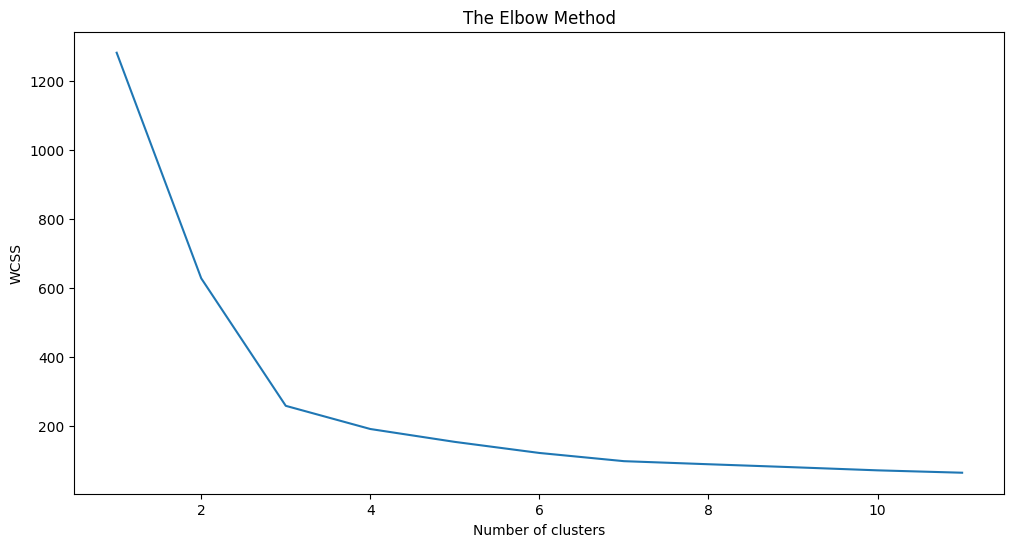

In [26]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 12), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [27]:
# k-Means
# Optimum number of clusters obtained from the Elbow method is 3

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

#kmeans is the trained model
#y_kmeans: array contains the cluster labels that were assigned to the training data during the fitting process
#The fit_predict() method of the KMeans class is used to fit the model to the data and obtain the
#cluster assignments for each sample.
#The resulting cluster labels are stored in y_kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [28]:
#Assigning cluster to features

# Get the cluster labels for each sample
labels = kmeans.labels_


# Add a new column for customer types based on cluster labels

clust_data=data.copy()
clust_data['Cluster'] = labels

Visualization

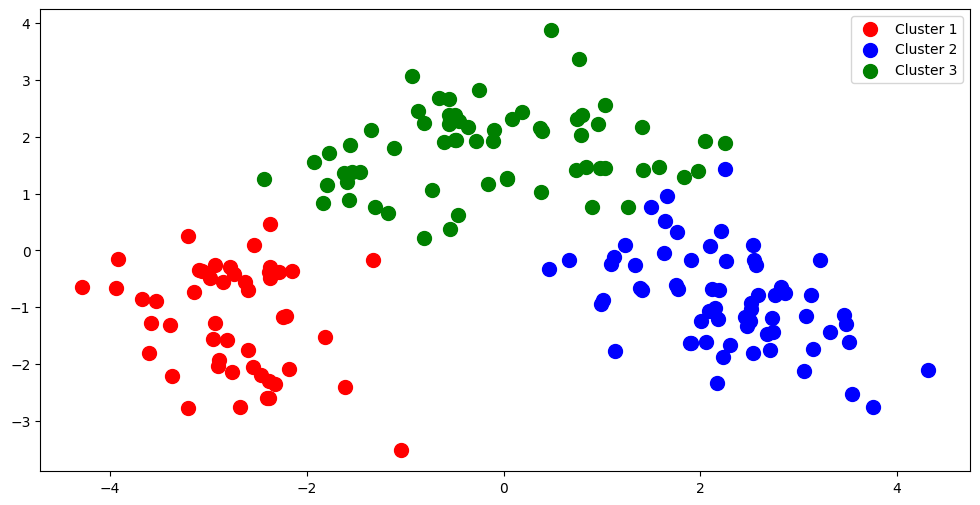

In [29]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.legend()
plt.show()

In [30]:
clust_data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0


In [31]:
clust_data['Cluster'].unique()

array([1, 2, 0], dtype=int32)

**Evaluation metrics**

Checking for accuracy score

In [32]:
from sklearn.metrics import silhouette_score

#Silhouette score of kmeans clustering
silhouette_avg1 = silhouette_score(X, y_kmeans)
print(silhouette_avg1)


0.5610505693103248


In [33]:
# Silhouette score lies between -1 and +1 . If it is near to 0.5 is better.
# ).56 is considered as a better value

#**Hierarchical Agglomerative  Clustering**

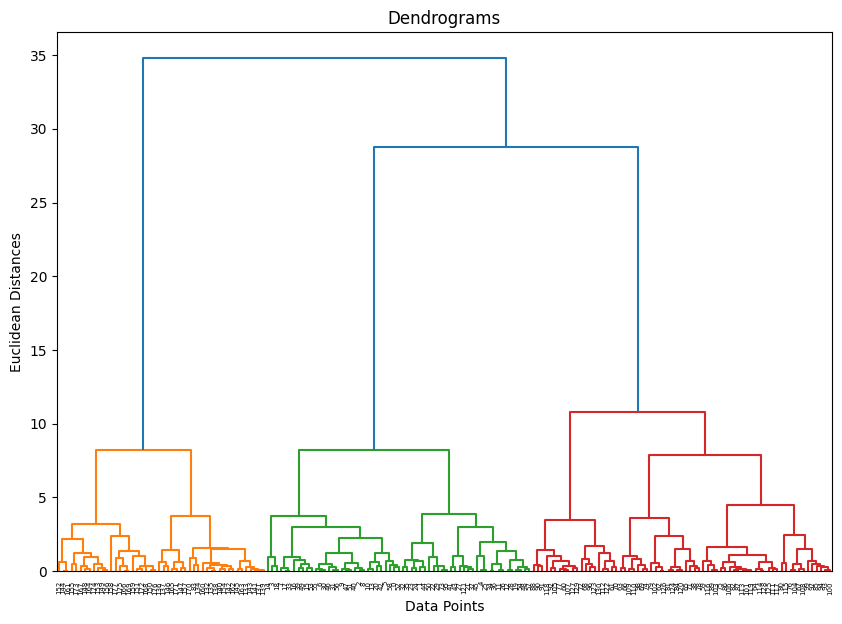

In [34]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10,7))
plt.title('Dendrograms')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
dend=shc.dendrogram(shc.linkage(X,method='ward'))

# the linkage method determines how the distance between clusters is calculated
# The method='ward' parameter in the sch.linkage function refers to the Ward's method of linkage
# Ward's method is based on the analysis of variance (ANOVA)
# other methods are Single linkage ('single'), Complete linkage ('complete'), Average linkage ('average'),
#Centroid linkage ('centroid')



In [35]:
# Optimom number of clusters obtained is 3

In [36]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')

# n_clusters: number of clusters required
# affinity: This parameter determines the distance metric used for the linkage.
# affinity='euclidean' means Euclidean distance metric is used to measure the dissimilarity between points
# other affinity parametres are 'l1' or 'manhattan', 'l2' or 'euclidean', 'cosine', 'precomputed'
y_hc = hc.fit_predict(X)

# y_hc array contains the predicted cluster labels for each data point in X

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


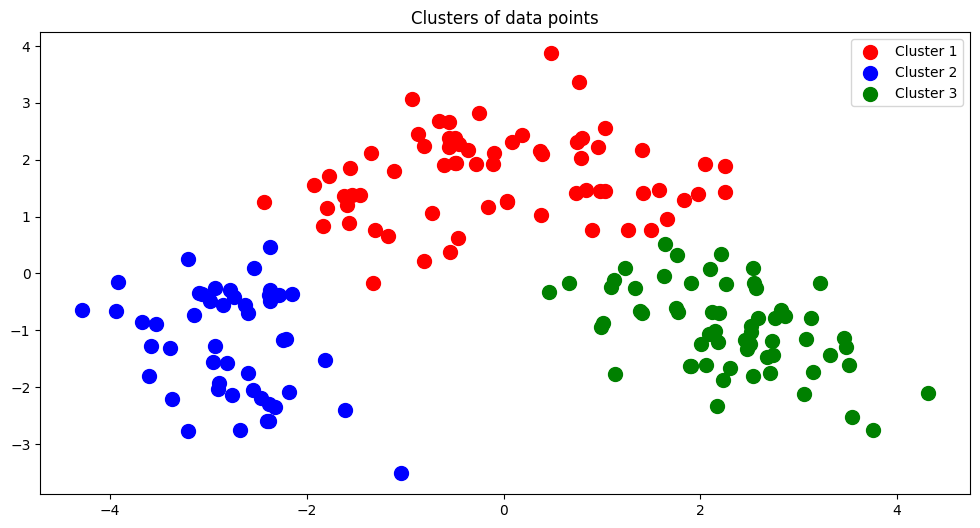

In [37]:
# Plotting data points from different clusters

plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')

# X[y_hc == 0, 0] represents the x-coordinates of the data points in cluster 0
# X[y_hc == 0, 1] represents the y-coordinates of the data points in cluster 0

plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')

plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

plt.title('Clusters of data points')
plt.legend()
plt.show()

**Evaluation metrics**

Checking for accuracy score

In [38]:
labels_kmeans = kmeans.labels_
labels_hc = hc.labels_

In [39]:
from sklearn import metrics

print("KMeans Silhouette Score: ",
      metrics.silhouette_score(X,labels_kmeans, metric = 'euclidean'))
print("HC Silhouette Score: ",
      metrics.silhouette_score(X,labels_hc, metric = 'euclidean'))

KMeans Silhouette Score:  0.5610505693103248
HC Silhouette Score:  0.5590883962040384


In [40]:
print("KMeans Davis-Bouldin Score: ",
      metrics.davies_bouldin_score(X,labels_kmeans))
print("HC Davis-Bouldin Score: ",
      metrics.davies_bouldin_score(X,labels_hc))

KMeans Davis-Bouldin Score:  0.5972661544221362
HC Davis-Bouldin Score:  0.601335729709085


 **Silhouette score lies between -1 and +1 .It is used to evaluate the quality of clusters created using clustering algorithms. Since it is around 0.5 is considered as a better value, or better modeling**

#**DBSCAN** Density-Based Spatial Clustering Of Applications With Noise

 (distance between nearest points)

In [41]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors


In [42]:
# Load data in db_data

db_data=pca_data.copy()

Modeling The Data Using DBSCAN

Plot different combinations of 𝑒𝑝𝑠𝑖𝑙𝑜𝑛 and 𝑚𝑖𝑛𝑃𝑡𝑠

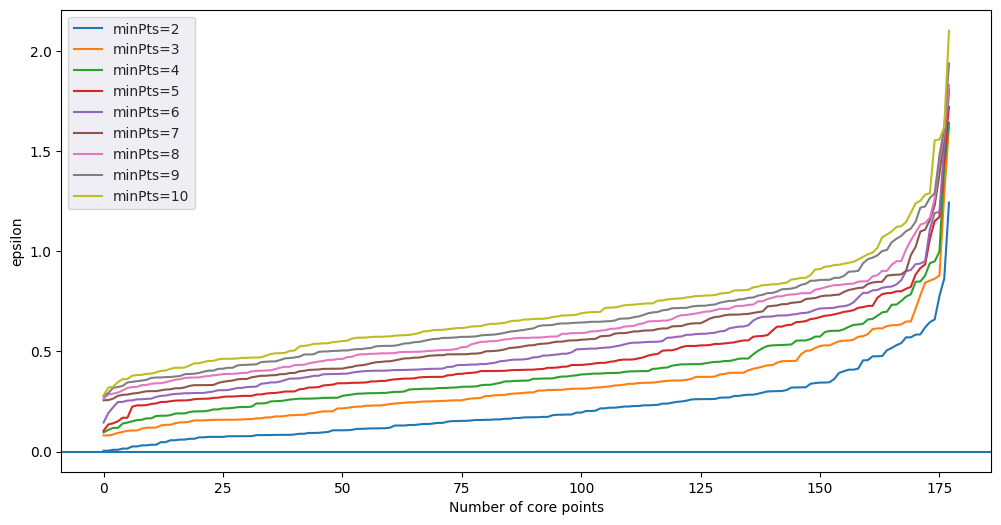

In [43]:
# It defines the neighborhood around a data point i.e. if the distance between two points is lower or equal to ‘eps’ then they are considered neighbors
# we use sklearn to find the nearest neighbors

neigh = NearestNeighbors(n_neighbors=10)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
for k in range(1, 10):
    distances_k = np.sort(distances[:,k], axis=0)
    plt.plot(distances_k, label='minPts=%i' % (k+1))
sns.set_style('darkgrid')
plt.ylabel('epsilon')
plt.xlabel('Number of core points')
plt.axhline()
plt.legend()
plt.show()

he horizontal lines mark 𝑒𝑝𝑠𝑖𝑙𝑜𝑛=0.5 and 𝑒𝑝𝑠𝑖𝑙𝑜𝑛=1.5 , which look like good value for 𝑚𝑖𝑛𝑃𝑡𝑠=2 , respectively 𝑚𝑖𝑛𝑃𝑡𝑠=10 . We now look at the results of DBSCAN for these two combinations in the PCA.

In [44]:
# imported DBSCAN from SKlearn

dbscan = DBSCAN(eps=1 ,min_samples=2)
y_db = dbscan.fit_predict(X)
clusters = dbscan.labels_
len(set(clusters))

2

In [45]:
clusters

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0])

Adding acolumn "Cluster" to the dataframe db_data

In [46]:
db_data['Cluster']=dbscan.labels_
db_data.head(10)

,PCA1,PCA2,Cluster
0,3.316751,-1.443463,0
1,2.209465,0.333393,0
2,2.516740,-1.031151,0
3,3.757066,-2.756372,0
4,1.008908,-0.869831,0
5,3.050254,-2.122401,0
6,2.449090,-1.174850,0
7,2.059437,-1.608963,0
8,2.510874,-0.918071,0
9,2.753628,-0.789438,0


In [47]:
db_data.Cluster.unique()

array([ 0, -1])

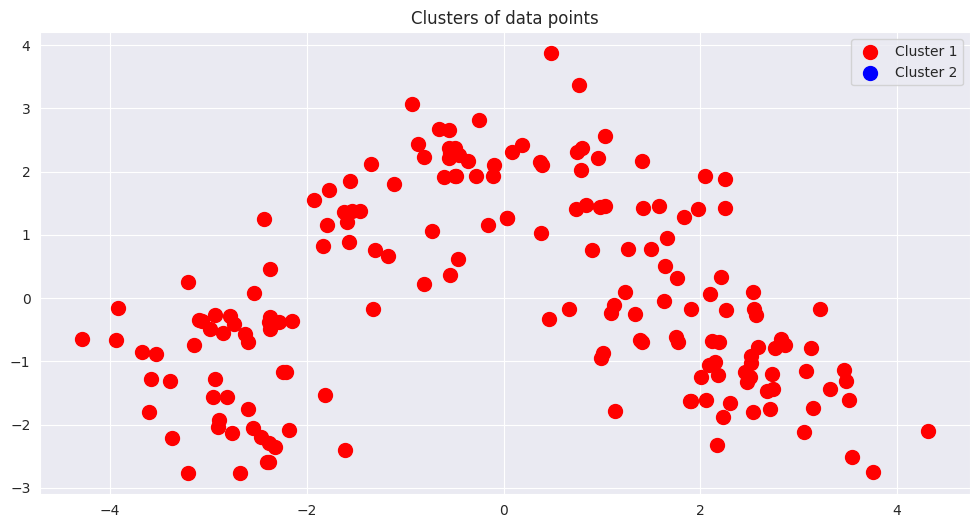

In [48]:
# Plotting data points from different clusters

plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1], s = 100, c = 'red', label = 'Cluster 1')

# X[y_db == 0, 0] represents the x-coordinates of the data points in cluster 0
# X[y_db == 0, 1] represents the y-coordinates of the data points in cluster 0

plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')

plt.title('Clusters of data points')
plt.legend()
plt.show()

**Evaluation metrics**

Checking for accuracy score

In [49]:

print("Silhouette Score: ",
      metrics.silhouette_score(X,clusters))
print("Calinski_harabasz Score: ",
      metrics.calinski_harabasz_score(X,clusters))
print("Davis-Bouldin Score: ",
      metrics.davies_bouldin_score(X, clusters))


Silhouette Score:  0.1855861563600239
Calinski_harabasz Score:  1.877211145393867
Davis-Bouldin Score:  0.6900100886767783


**We see that a weak silhouette_score. This may be due to equivalent densities across the regions which makes separation challenging.**